<img src= "https://c.tenor.com/QJNoPeq9WmUAAAAC/netflix-intro-netflix.gif" width="600" >

# Netflix Movie/TV Show Content Analysis #



### After looking through many datasets, Netflix, which is one of the largest streaming platforms, seemed like something interesting to look into.

## I wanted to answer the following questions:
* How much content is added to Netflix each year? What does the trend look like?
* What are the most popular movie and tv show genres on Netflix?
* Where is most of the content produced?

## Below is the data dictionary for this dataset:

| Field | Description |
| :-- | :-- |
| **show_id** | Primary key for every movie/tv show
| **type** | Categorizes the content as either a TV show or a Movie
| **title** | Title of the Netflix content
| **director** | Name of person(s) who directed the movie
| **cast** | Actors/Actresses involved in the movie/tv show
| **country** | Country where the movie/show was produced
| **date_added** | Date it was added to Netflix
| **release_year** | Year the movie/show was originally released
| **rating** | Rating of the movie/show
| **listed_in** | Genre of the movie/show
| **description** | Brief description of the movie/show

# **First Load Data**

In [1]:
import pandas as pd
import numpy as np  

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
#def strip_message(string):
  #  return string.strip('s')
#df['show_id'] = df['show_id'].apply(strip_message)
#df.set_index('show_id', inplace=True)
#df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape[0],df.shape[1]

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)

In [10]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4529,7693,749,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Not Listed,Not Listed,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# **How much content is added to Netflix each year? What does the trend look like?**

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Not Listed,Not Listed,Not Listed,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


When a csv file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather a Date Time object and Hence it’s very tough to perform operations like Time difference on a string rather a Date Time object. Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [14]:
df['year_added'] = df['date_added'].dt.year

dt can be used to access the values of the series as datetimelike and return several properties. Pandas Series.dt.year attribute return a numpy array containing year of the datetime in the underlying data of the given series object.

In [15]:
freq_table = pd.crosstab(index = df['year_added'],
                         columns = df['type'])
freq_table.columns = ['Movie','TV Show']   #  Replace None Values with correct value or method   
freq_table


,Movie,TV Show
year_added,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,5
2014.0,19,5
2015.0,56,26
2016.0,253,176


In [16]:
c=freq_table.groupby('year_added')
c=c.sum()
c=c.sort_values(['Movie'],ascending=False)
c

,Movie,TV Show
year_added,,
2019.0,1424,592
2020.0,1284,595
2018.0,1237,412
2021.0,993,505
2017.0,839,349
2016.0,253,176
2015.0,56,26
2014.0,19,5
2011.0,13,0


In [17]:
c['num_pro']=c['Movie']+c['TV Show']

In [18]:
c=c.sort_values('num_pro',ascending=False)
c.head(1)

,Movie,TV Show,num_pro
year_added,,,
2019.0,1424,592,2016


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

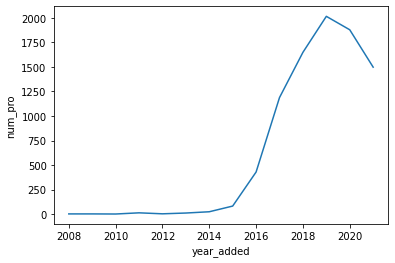

In [20]:
sns.lineplot(data=c, x="year_added", y="num_pro")

I think it is cool to see Netflix's progress in adding so much content for users to watch though, the content has been growing steadily since around 2016. 

# **What are the most popular movie and tv show genres on Netflix?**


In [21]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [22]:
# I need to oraganize My column take first index as main  
def get_on_gener (s):
  return s.split(',')[0]
df['main_gener'] = df.listed_in.apply(get_on_gener)  

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,main_gener
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Documentaries
1,s2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Docuseries
4,s5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,International TV Shows


In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'main_gener'],
      dtype='object')

In [25]:
df_movie=df.loc[df['type']=='Movie']
df_tvshow=df.loc[df['type']=='TV Show']

In [26]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,main_gener
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Listed,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,Dramas
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Cult Movies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Children & Family Movies


In [27]:
cx=df_movie.groupby('main_gener').agg({'show_id':'count'})
cx['main'] = cx.index
cx=cx.sort_values(['show_id'],ascending=False)
cx.head()

,show_id,main
main_gener,,
Dramas,1600,Dramas
Comedies,1210,Comedies
Action & Adventure,859,Action & Adventure
Documentaries,829,Documentaries
Children & Family Movies,605,Children & Family Movies


In [28]:
cx.head(1)

,show_id,main
main_gener,,
Dramas,1600,Dramas


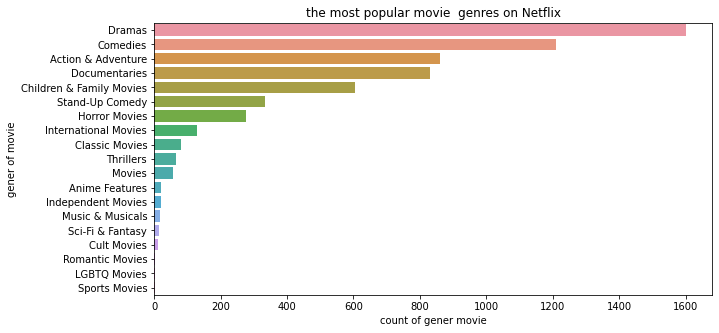

In [29]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
sns.barplot(data = cx ,x = 'show_id' ,y = 'main' )
plt.ylabel("gener of movie")
plt.xlabel("count of gener movie")
plt.title("the most popular Movie genres on Netflix")
plt.show()

Now I find these top genres less surprising. There still may be a lack of accuracy, but I definitely am not surprised that a lot of Netflix movies fall under the genres of Drama, Comedy and Action & Adventure.

In [30]:
df_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,main_gener
1,s2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Docuseries
4,s5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,International TV Shows
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Listed,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,TV Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Not Listed,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,Anime Series
8796,s8797,TV Show,Yunus Emre,Not Listed,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,International TV Shows
8797,s8798,TV Show,Zak Storm,Not Listed,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,Kids' TV
8800,s8801,TV Show,Zindagi Gulzar Hai,Not Listed,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,International TV Shows


In [31]:
cz=df_tvshow.groupby('main_gener').agg({'show_id':'count'})
cz['main_tv']=cz.index
cz=cz.sort_values(['show_id'],ascending=False)

In [32]:
cz.head(1)

,show_id,main_tv
main_gener,,
International TV Shows,774,International TV Shows


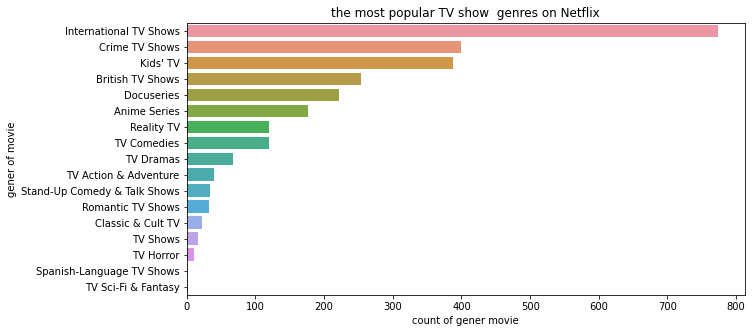

In [33]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
sns.barplot(data = cz ,x = 'show_id' ,y = 'main_tv' )
plt.ylabel("gener of movie")
plt.xlabel("count of gener movie")
plt.title("the most popular TV show  genres on Netflix")
plt.show()

So the the most common TV Show genre is International TV Shows! I found this quite interesting because I had never thought that that genre would be so common.

Now it is important to note that this may not be completely accurate due to the selection of the first genre that appeared on the dataset, but I think that there is such an overwhelming amount of International TV Shows over other genres that it still means there is a significant amount more.

# **Where is most of the content produced?**

In [34]:
df['country']=df['country'].fillna('No listed')

In [35]:
df['country'].head(10)

0                                        United States
1                                         South Africa
2                                           Not Listed
3                                           Not Listed
4                                                India
5                                           Not Listed
6                                           Not Listed
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [36]:
df['main_country']=df['country'].apply(get_on_gener)

In [37]:
df['main_country']

0       United States
1        South Africa
2          Not Listed
3          Not Listed
4               India
            ...      
8802    United States
8803       Not Listed
8804    United States
8805    United States
8806            India
Name: main_country, Length: 8807, dtype: object

In [38]:
freq_table = pd.crosstab(index = df['main_country'],
                         columns = df['type'])
freq_table.columns = ['Movie','TV Show']   #  Replace None Values with correct value or method   
freq_table

,Movie,TV Show
main_country,,
,1,1
Argentina,56,20
Australia,61,56
Austria,8,1
Bangladesh,3,0
...,...,...
Uruguay,8,1
Venezuela,2,0
Vietnam,7,0


In [39]:
df2=freq_table.groupby('main_country').agg({'Movie':'sum'})
df2=df2.sort_values(['Movie'],ascending=False)

In [40]:
df2=df2.reset_index()

In [41]:
df2.head(1)

,main_country,Movie
0,United States,2364


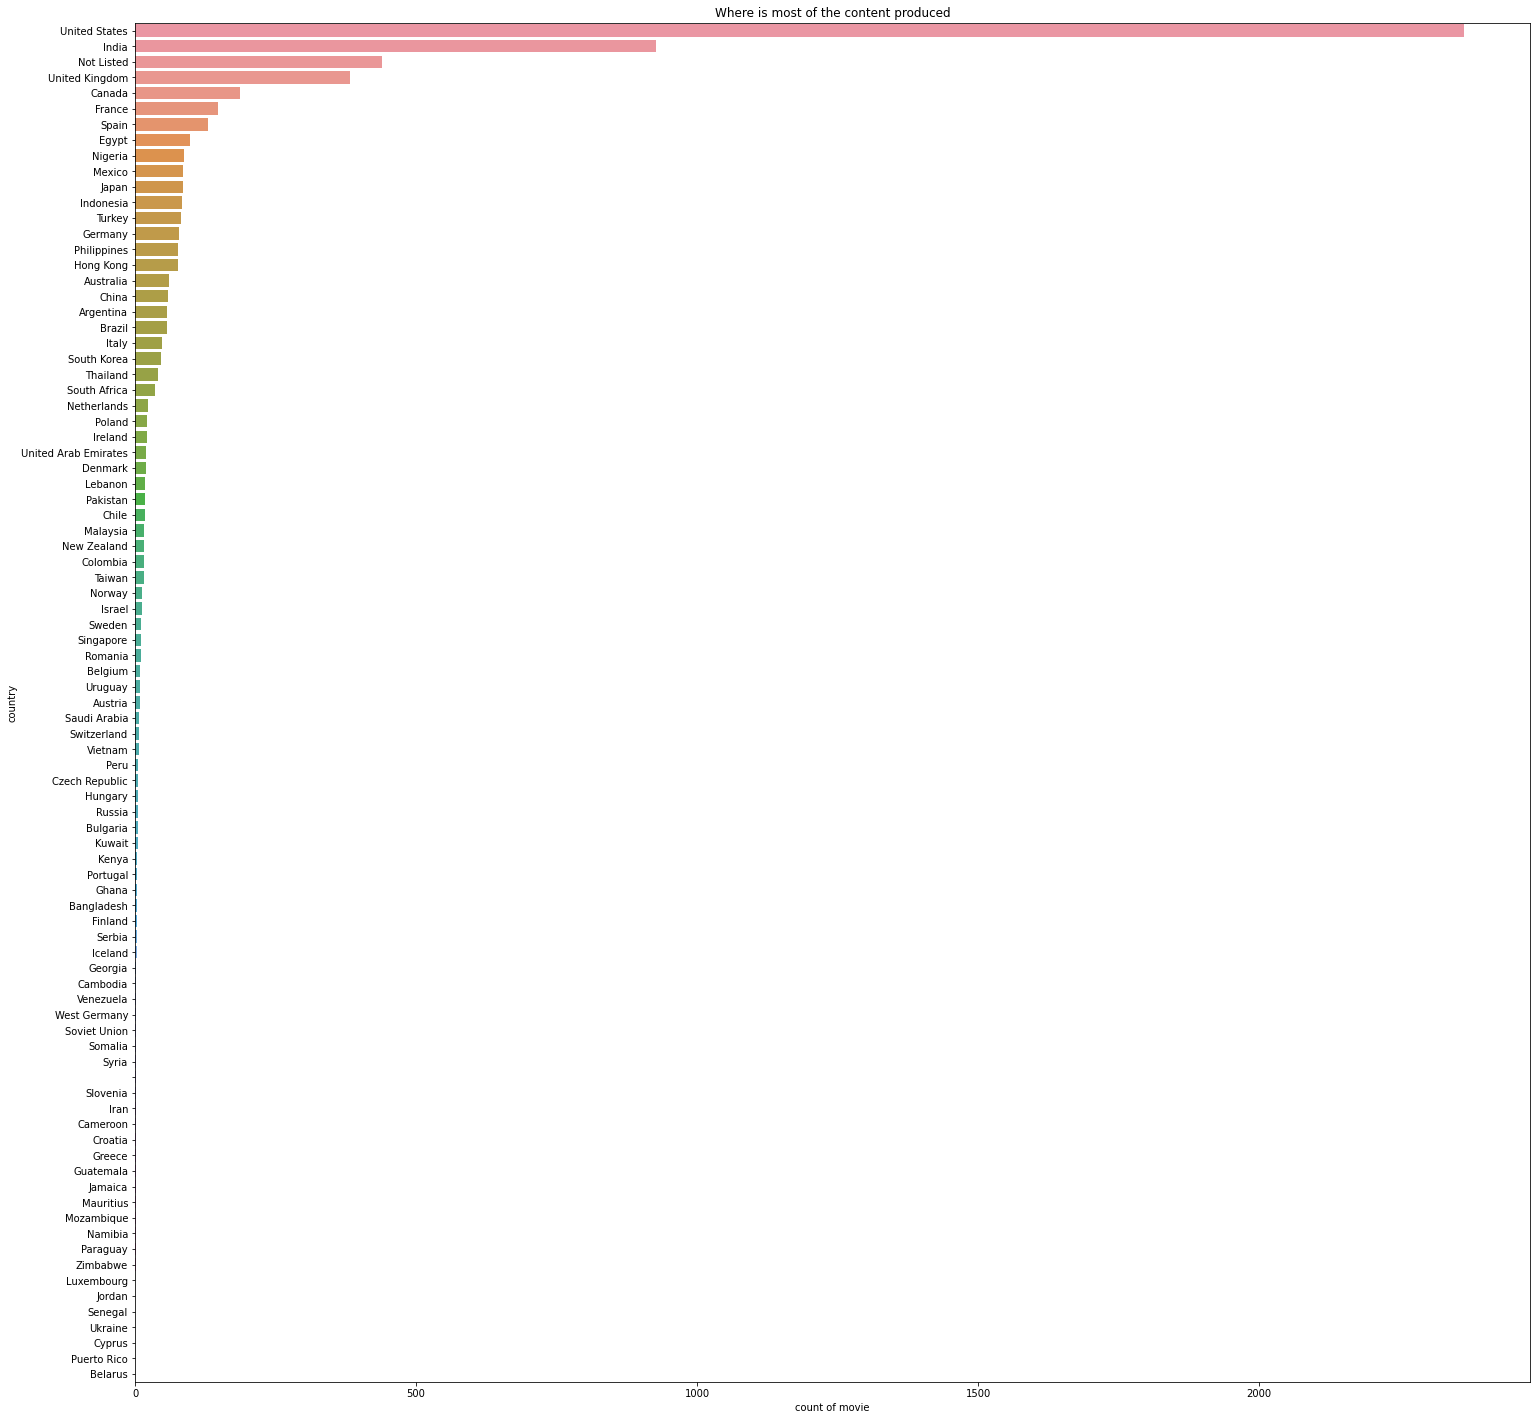

In [42]:
fig = plt.figure(figsize = (25, 25))
# creating the bar plot
sns.barplot(data = df2 ,y = 'main_country',x = 'Movie' )
plt.xlabel("count of movie")
plt.ylabel("country")
plt.title("Where is most of the content produced")
plt.show()

In [43]:
df3=freq_table.groupby('main_country').agg({'TV Show':'sum'})
df3=df3.sort_values(['TV Show'],ascending=False)

In [44]:
df3.head(1)

,TV Show
main_country,
United States,847


In [45]:
df3=df3.reset_index()

In [46]:
df3.head(1)

,main_country,TV Show
0,United States,847


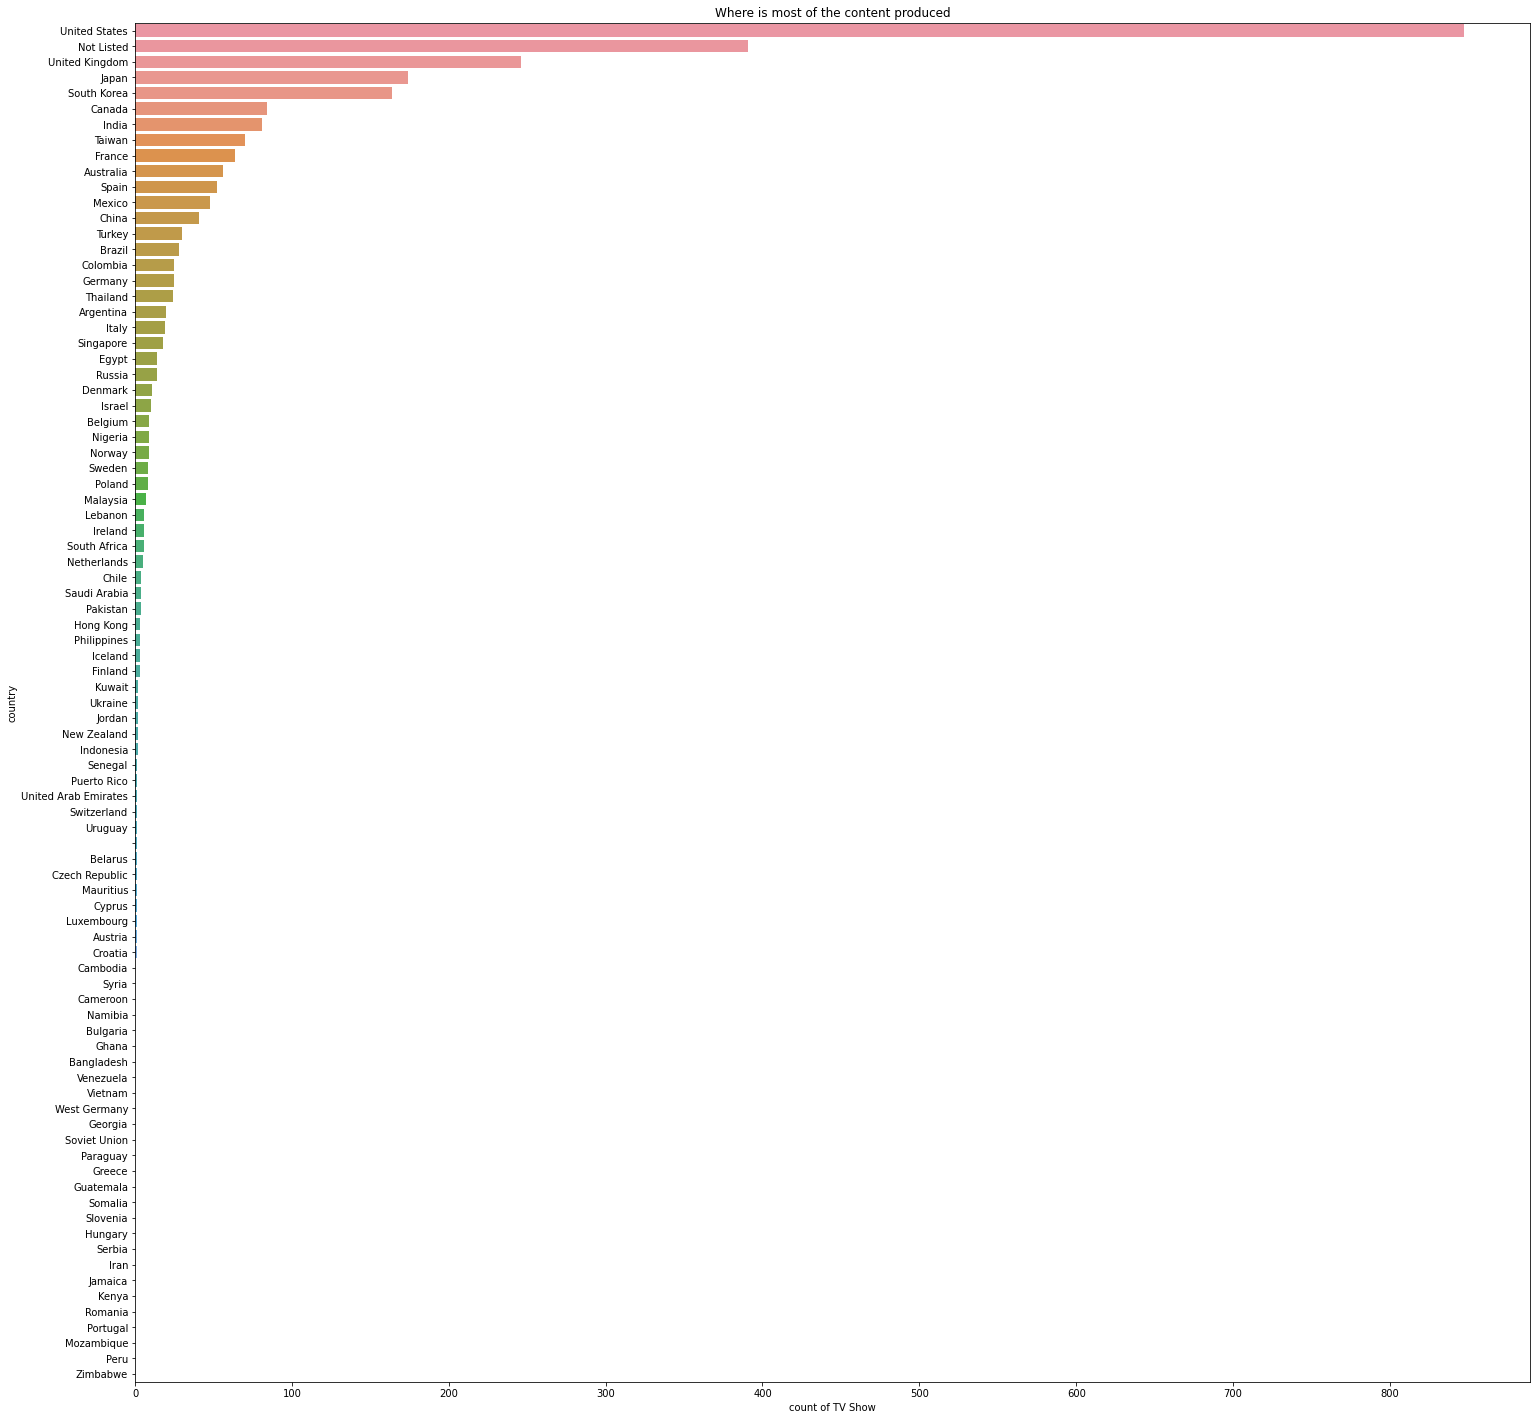

In [47]:
fig = plt.figure(figsize = (25, 25))
# creating the bar plot
sns.barplot(data = df3 ,y = 'main_country',x = 'TV Show' )
plt.xlabel("count of TV Show")
plt.ylabel("country")
plt.title("Where is most of the content produced")
plt.show()

Since this data was taken from the content on the United States Netflix, it makes a lot of sense that the US is the top producer of content by a long shot compared to other countries.